What are my targets, exactly?
* KC price or actual import price?

What are my features?
* Weather (up to harvest season)
* Grower economic forecast
* Grower political forecast (risk analysis)


Would it be better to track coffee ETFs based on physical commodities, or would futures be OK?

If tracking futures, don't those funds have access to the same information I do? Essentially, wouldn't I be reverse-engineering those funds? (If bad weather is in the news, the futures price goes up and my model tracks up too.) JO:US

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
# sns.set_palette("muted")
%matplotlib inline

## Webscraping ICO composite index

In [2]:
# import json
# import requests

# data_json = json.loads(requests.get("https://knoema.com/api/1.0/data/UNCTADFMCPI2015Aug?time=1979M10-2016M11&commodity=1000260,1000250,1000240,1000230,1000220,1000210,1000200,1000190&frequencies=M").text)
# list(data_json.keys())

In [3]:
# values_from_data = [data_json["data"][i]["Value"] for i in range(len(data_json["data"]))]
# times_from_data = [data_json["data"][i]["Time"] for i in range(len(data_json["data"]))]
# data_indexes = data_json["header"][0]["members"]

In [4]:
# dataframe = pd.DataFrame(columns = data_json["stub"][0]["members"], index = times_from_data)
# for index in data_json["data"]:
#     dataframe.ix[index["Time"], index["commodity"]] = index['Value']

# dataframe

# # organized as:
# # |______|_commodity_|_commodity_|
# # | Time | Value     | Value     |

In [5]:
# %%html
# <iframe src="https://knoema.com/resource/embed/UNCTADFMCPI2015Aug" allowtransparency="true" scrolling="no" frameborder="0" style="height:900px;width:940px;min-width:560px;"></iframe>

In [6]:
# %%html 
# <h1>ICO Glossary</h1>
# <iframe src = "http://www.ico.org/glossary.asp" style="height:400px;width:800px;min-width:560px;">ICO glossary</iframe>

In [7]:
# %%html 
# <h1>ICO Members</h1>
# <iframe src = "http://www.ico.org/members_e.asp?section=About_Us" style="height:400px;width:800px;min-width:560px;">ICO Members</iframe>


> Free market commodity prices, monthly, January 1960 - Novembre 2016
 	
> Title:	Free market commodity prices, monthly, January 1960 - Novembre 2016
Author:	UNCTAD
Category:	Commodities
Keywords:	commodities, prices, indices
 	 
> Notes:
 	
>Description:
This table presents monthly average free market prices for selected commodities exported by developing economies.  The monthly averages are calculated from daily quotations except in the case of the averages for wheat, cotton, tea, vegetable oilseeds and oils and cattle hides, which are calculated from weekly quotations.

> Coffee 
Average of daily prices. 
As from October 2001, I.C.A. 2001:
1. Ex-dock USA: Colombian mild Arabicas: Excelso, UGQ, screen size 14.
2. Ex-dock USA: Brazilian and other natural Arabicas: Santos 4.
3. Other mild Arabicas, weighted average of:
- 3.1. Ex-dock USA: El Salvador Central Standard, Guatemala Prime Washed, Mexico Prime Washed and Costa Rica Hard Bean.
- 3.2. Ex-dock EU: El Salvador Strictly High Grown, Guatemala Hard Bean, Nicaragua Strictly High Grown and Costa Rica Hard Bean.
4. Robustas, weighted average of:
- 4.1. Ex-dock USA: Côte d'Ivoire Grade 2, Uganda Standard, Indonesia EK Grade 4 and Vietnam Grade 2.
- 4.2. Ex-dock EU: Côte d'Ivoire Grade 2, Cameroon Grade 1, Indonesia EK Grade 4, Uganda Standard and Vietnam Grade 2.
5. Composite indicator price 1976 version, arithmetic mean of:
- Ex-dock USA: Other mild Arabicas
- Ex-dock USA: Robustas. 
As from October 2015, I.C.A. 2007:
6. ICO Composite indicator price, weighted as follows:
- 10% Colombian milds

> (54% USA and 46% EU)

> - 23% Other mild Arabicas

> (41% USA and 59% EU)

> - 30% Brazilian naturals

> (26% USA and 74% EU)

> - 37% Robustas

> (17% USA and 83% EU)


> For previous weights of I.C.A., please refer to the International Coffee Organization's (ICO) website. 
(International Coffee Organization (ICO), London, United Kingdom) 

In [8]:
raw_data = pd.read_csv("../datasets/capstone/us_monthlycommoditypriceaverages_03927558512071.csv", encoding = "ISO-8859-1", header = 1)

In [9]:
data = raw_data.drop(labels = 0).T
data.columns = data.loc["PERIOD", :]
data = data.drop(labels = ["PERIOD"])
data = data.apply(pd.to_numeric, errors = 'coerce')

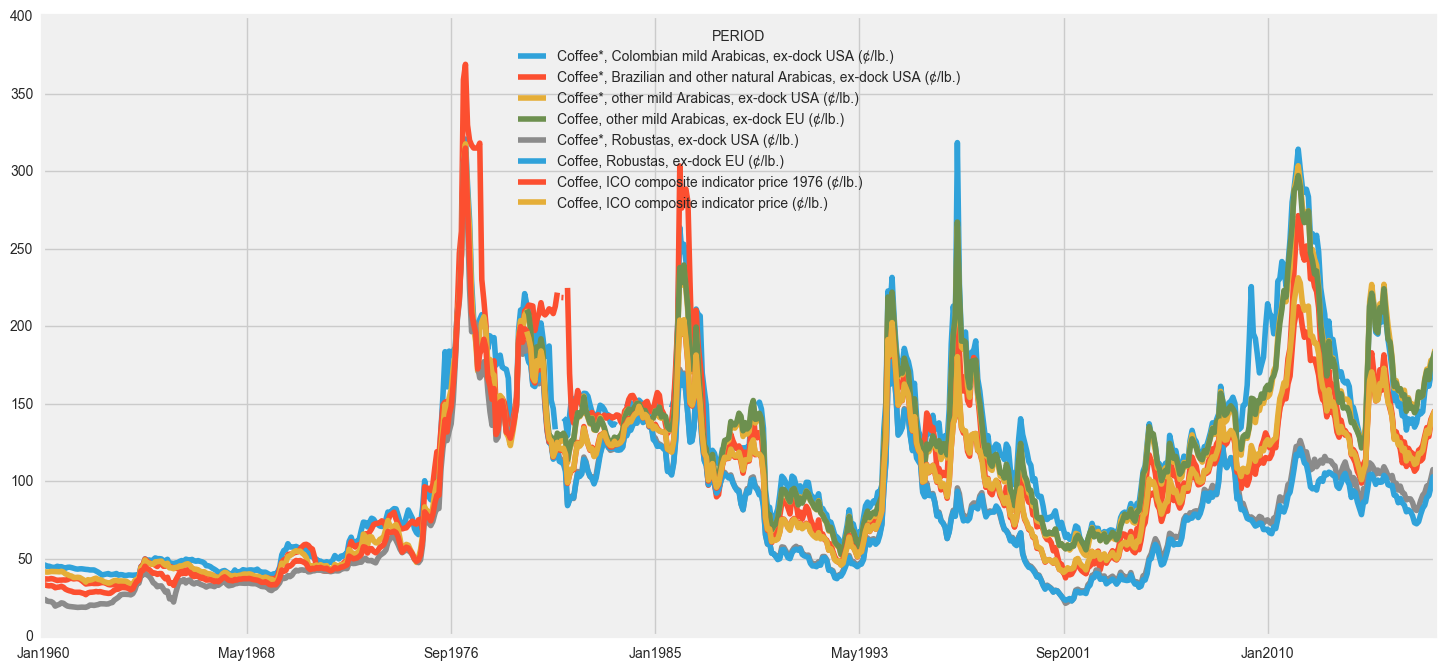

In [10]:
# data[["Coffee, ICO composite indicator price 1976 (¢/lb.)", "Coffee, ICO composite indicator price (¢/lb.)"]].plot(figsize=(16,8))
data.plot(figsize=(16,8))
sns.plt.show()

In [11]:
raw_xls_data = pd.read_excel("../datasets/capstone/Coffee C Historical Prices.xls", skiprows = 4)

In [12]:
KC_futures_prices = raw_xls_data[["DATE", "CONTRACT (YYYY/MM)", "CLOSE"]]

In [13]:
KC_futures_prices.loc[:, "DATE"] = KC_futures_prices["DATE"].apply(pd.to_datetime)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
# KC_futures_prices["CLOSE"].plot()
#data.apply(pd.to_datetime)
#["Coffee, ICO composite indicator price (¢/lb.)"].plot()

In [15]:
coffee_producing_countries = pd.read_html(io = "https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production", header = 0)[0]

In [16]:
coffee_producing_countries["Country"]

0                               Brazil
1                              Vietnam
2                             Colombia
3                            Indonesia
4                             Ethiopia
5                             Honduras
6                                India
7                               Uganda
8                               Mexico
9                            Guatemala
10                                Peru
11                           Nicaragua
12              China(2013/14 est.)[2]
13                         Ivory Coast
14                          Costa Rica
15                               Kenya
16                    Papua New Guinea
17                            Tanzania
18                         El Salvador
19                             Ecuador
20                            Cameroon
21                                Laos
22                          Madagascar
23                               Gabon
24                            Thailand
25                       

Brazil provides coffee crop information (production and planting area) for 2001--2016: 
http://www.conab.gov.br/

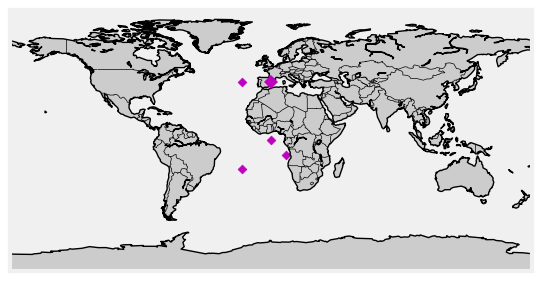

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
# map.drawparallels(range(34, 50, 2), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )

# map = Basemap(resolution='l', 
#               satellite_height=3000000.,
#               projection='nsper', 
#               lat_0 = 30., lon_0 = -27.,
#               llcrnrx=500000.,llcrnry=500000.,urcrnrx=2700000.,urcrnry=2700000.
#              )



map = Basemap()
x, y = map(0, 40)
map.plot(x, y, marker='D',color='m')

lons = [0, 10, -20, -20]
lats = [0, -10, 40, -20]

x, y = map(lons, lats)
map.scatter(x, y, marker='D',color='m')

map.fillcontinents()
map.drawcoastlines()
map.drawcountries()

plt.show()

### Finding the coffee production schedule

In [1]:
# unformatted_coffee_production_seasons = pd.read_html("http://www.thecoffeeguide.org/coffee-guide/world-coffee-trade/crop-years-in-coffee-producing-countries/", header = 0)[0]

# coffee_production_seasons = pd.DataFrame()
# unformatted_coffee_production_seasons.columns = ["Crop Years in producing countries", 1, 2, 3]
# unformatted_coffee_production_seasons[unformatted_coffee_production_seasons.isnull().loc[:,3]] = unformatted_coffee_production_seasons[unformatted_coffee_production_seasons.isnull().loc[:,3]].shift(axis = 1)

# for i, row in enumerate(unformatted_coffee_production_seasons.index):
#     if unformatted_coffee_production_seasons["Crop Years in producing countries"].isnull().loc[row]:
#         unformatted_coffee_production_seasons.loc[row, "Crop Years in producing countries"] = unformatted_coffee_production_seasons.ix[i - 1, "Crop Years in producing countries"]


# for production_season in unformatted_coffee_production_seasons["Crop Years in producing countries"].unique():
#     countries = unformatted_coffee_production_seasons.loc[unformatted_coffee_production_seasons["Crop Years in producing countries"] == production_season, [1,2,3]].values.flatten()
#     coffee_production_seasons = pd.concat([coffee_production_seasons, pd.Series(name = production_season, data = countries)], axis = 1)
    
# coffee_production_seasons.to_csv("../datasets/capstone/coffee\ production\ schedule.csv")
# coffee_production_seasons
pd.read_csv("../datasets/capstone/Coffee Producing Countries and Their Harvest Seasons.csv", index_col=0)


NameError: name 'pd' is not defined

### Importing commodity data from IMF (Coffee index from ICO)

In [19]:
IMF_commodity_data = pd.read_excel("../datasets/capstone/IMF-commodity-data--External_Data.xls").loc[:, ["Index.2", "USD.6", "USD.7"]]

In [20]:
IMF_commodity_data.columns = IMF_commodity_data.iloc[0]
IMF_commodity_data_column_names = IMF_commodity_data.iloc[1:2]
IMF_commodity_data_column_names

,PFANDB,PCOFFOTM,PCOFFROB
1,"Food and Beverage Price Index, 2005 = 100, inc...","Coffee, Other Mild Arabicas, International Cof...","Coffee, Robusta, International Coffee Organiza..."


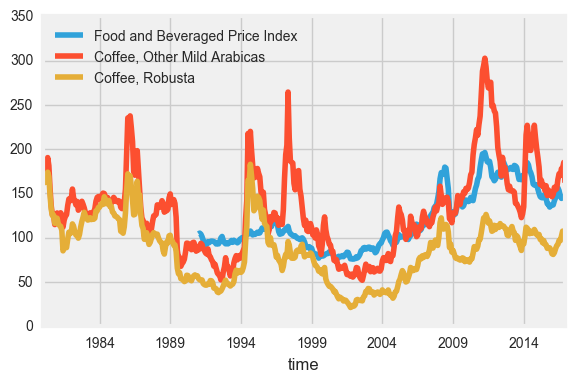

In [21]:
cleaned_IMF_commodity_data = IMF_commodity_data.drop(labels = [0,1,2]).reset_index(drop = True).apply(pd.to_numeric)
cleaned_IMF_commodity_data["time"] = pd.date_range('1/1/1980', periods=444, freq='M')
cleaned_IMF_commodity_data.columns = ["Food and Beveraged Price Index", "Coffee, Other Mild Arabicas","Coffee, Robusta", "time"]
cleaned_IMF_commodity_data.plot(x = "time")

### Downloading weather data from NCDC at NOAA

https://www.ncdc.noaa.gov/cdo-web/webservices/v2

Monthly weather data:
    https://catalog.data.gov/dataset/monthly-summaries-of-the-global-historical-climatology-network-daily-ghcn-d/resource/4f277848-e3e9-4528-8963-a97475e0c226

In [22]:
# %%bash 
# curl -H "token:WjnVbfnNMBEMmKeKDFliKZFIzRBEfTSk" "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&locationid=FIPS:BR&datatypeid=PRCP&datacategoryid=TEMP&startdate=2006-01-01&enddate=2016-01-01&limit=1000" > ~/Desktop/NCDC-NOAA_data.txt

%%bash 
curl -H "token:WjnVbfnNMBEMmKeKDFliKZFIzRBEfTSk" "https://www.ncdc.noaa.gov/cdo-web/api/v2/datatypes" > ~/Desktop/data.txt


Data categories = "PRCP"
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&locationid=FIPS:BR&datatype=PRCP&units=standard&startdate=2010-05-01&enddate=2015-05-31
"https://www.ncdc.noaa.gov/cdo-web/api/v2/data&datasetid=GSOM&datacategoryid=PRCP&locationid=FIPS:BR" > ~/Desktop/available_locations.txt

In [23]:
# import subprocess
# bashCommand = 'curl -H "token:WjnVbfnNMBEMmKeKDFliKZFIzRBEfTSk" "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&locationid=FIPS:BR&datatypeid=PRCP&datacategoryid=TEMP&startdate=2006-01-01&enddate=2016-01-01&limit=1000"'
# process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
# output, error = process.communicate()

In [24]:
# northern_hemisphere_seasonal_events = {"winter solstice": datetime.date(2017,12,21), 
#                                        "summer solstice": datetime.date(2017,6,21), 
#                                        "spring equinox": datetime.date(2017,3,20), 
#                                        "fall equinox": datetime.date(2017,9,22)}
# southern_hemisphere_seasonal_events = {"winter solstice": northern_hemisphere_seasonal_events["summer solstice"], 
#                                        "summer solstice": northern_hemisphere_seasonal_events["winter solstice"], 
#                                        "spring equinox": northern_hemisphere_seasonal_events['fall equinox'], 
#                                        "fall equinox": northern_hemisphere_seasonal_events["spring equinox"]}

northern_hemisphere_seasons = {1: 'winter', 2: 'winter', 3: 'winter', 4: 'spring', 5: 'spring', 6: 'spring', 7: 'summer', 8: 'summer', 9: 'summer', 10: 'fall', 11: 'fall', 12: 'fall'}

southern_seasons = {7: 'winter', 8: 'winter', 9: 'winter', 10: 'spring', 11: 'spring', 12: 'spring', 1: 'summer', 2: 'summer', 3: 'summer', 4: 'fall', 5: 'fall', 6: 'fall'}

def get_season (date, seasons_dictionary = None):
    season = seasons_dictionary[date.month]
    return season

In [25]:
# Import NOAA data for Brazil
raw_NOAA_data = pd.read_csv("../datasets/capstone/Brazil-weather-JAN1980-JAN2017-NOAA-CDO8887187250151.txt")


In [26]:
NOAA_data = raw_NOAA_data.copy()

# Removing whitespace from columns names
cleaned_NOAA_column_names = []
for column in NOAA_data.columns:
    cleaned_NOAA_column_names.append(column.strip())
NOAA_data.columns = cleaned_NOAA_column_names

# Adding seasons
NOAA_data["YEARMODA"] = NOAA_data["YEARMODA"].apply(pd.to_datetime,format = "%Y%m%d")
NOAA_data["season"] = NOAA_data["YEARMODA"].apply(get_season, seasons_dictionary = southern_seasons)

# Converting temperature data
NOAA_data["MAX"] = NOAA_data["MAX"].replace("\*", "", regex = True).apply(pd.to_numeric, errors = 'coerce')
NOAA_data["MIN"] = NOAA_data["MIN"].replace("\*", "", regex = True).apply(pd.to_numeric, errors = 'coerce')

# Converting precipittin data
NOAA_data["prcp_code"] = NOAA_data["PRCP"].str[-1]
NOAA_data["PRCP"] = NOAA_data["PRCP"].str[0:-1]
NOAA_data["PRCP"] = NOAA_data["PRCP"].apply(pd.to_numeric, errors = 'coerce')
NOAA_data[NOAA_data["PRCP"] == 99.99] = np.NaN

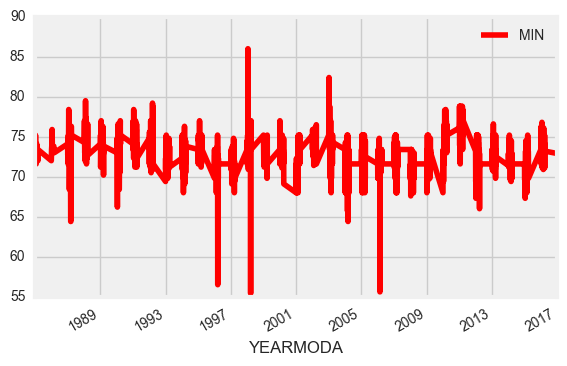

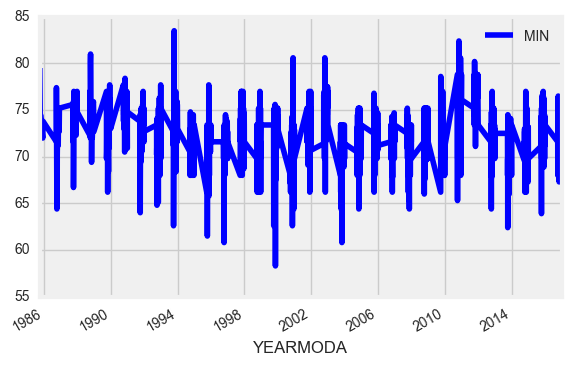

In [27]:
NOAA_data[NOAA_data["season"] == "summer"].plot(x = "YEARMODA", y = "MIN", c = 'r')
NOAA_data[NOAA_data["season"] == "spring"].plot(x = "YEARMODA", y = "MIN", c = 'b')


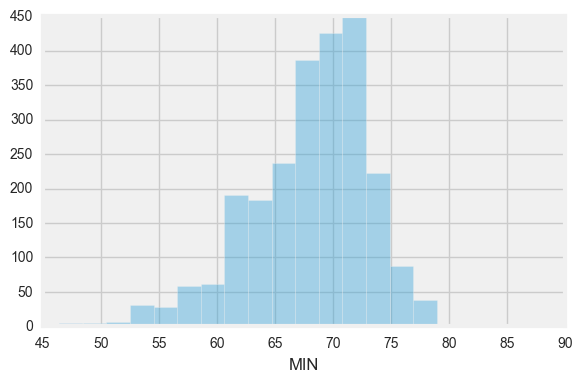

In [28]:
sns.distplot(NOAA_data[NOAA_data['season'] == 'winter']['MIN'], bins = 20, kde = False)
plt.show()

Good project vs. great project = difference of about \$30k-\$40k
Don't delete cells
Pipeline
preliminary modeling
Different jupyter notebook for different tasks: import and EDA on weather data, import and EDA on ICO index, etc.
Connect trello board with links